<a href="https://colab.research.google.com/github/AnanyaBansal4/ML-Applications-to-Process-Engineering-PMMA-Reactor-Unit-/blob/main/PMMA_Non_linear_methods_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()

Saving PMMA_Data_Set_1.xlsx to PMMA_Data_Set_1.xlsx


In [ ]:
df = pd.read_excel(uploaded['PMMA_Data_Set_1.xlsx'])
df=df.drop(['No of Samples'], axis=1)
for i in df.columns:
    df[i]=pd.to_numeric(df[i], errors='coerce')
df.head()

,Initiator Concentration(CI),Temperature (T),Jacket Temperature (T),Coolant water flowrate (Fcw),Monomer inlet Flowrate (F),Coolant inlet temp.water (Two),Inlet temparature of Feed (Tin),Target variable (Monomer Concentration)
0,0.024431,346.867279,331.874633,0.1588,1.028782,293.2,350.014529,6.061848
1,0.025016,342.013221,334.982669,0.1588,1.003295,293.2,349.904450,6.054868
2,0.025366,344.491549,332.124375,0.1588,0.987497,293.2,350.088297,6.030551
3,0.025038,345.638794,326.586010,0.1588,1.000396,293.2,350.167016,6.021833
4,0.025017,344.759025,336.650641,0.1588,1.001877,293.2,349.933011,6.038306


In [ ]:
df.describe()

,Initiator Concentration(CI),Temperature (T),Jacket Temperature (T),Coolant water flowrate (Fcw),Monomer inlet Flowrate (F),Coolant inlet temp.water (Two),Inlet temparature of Feed (Tin),Target variable (Monomer Concentration)
count,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.0,6000.000000,6000.000000
mean,0.025075,349.430084,331.626363,1.588000e-01,1.000060,293.2,350.000100,6.039932
std,0.000238,3.545478,3.322300,2.775789e-17,0.009995,0.0,0.079624,0.012250
min,0.024238,334.848325,320.642900,1.588000e-01,0.960181,293.2,349.654122,5.973775
25%,0.024913,347.062139,329.350333,1.588000e-01,0.993372,293.2,349.947217,6.031959
50%,0.025072,349.407225,331.659500,1.588000e-01,1.000116,293.2,349.998221,6.040533
75%,0.025237,351.820496,333.887454,1.588000e-01,1.006736,293.2,350.053336,6.048278
max,0.026032,363.452605,343.230499,1.588000e-01,1.034302,293.2,350.311722,6.081033


<Axes: >

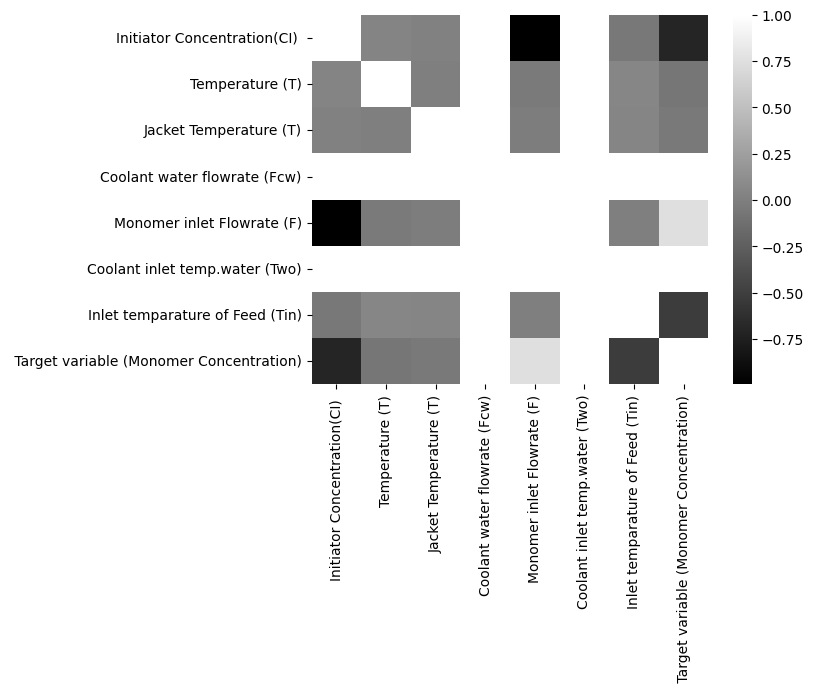

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='gray')

In [ ]:
df.drop(['Coolant water flowrate (Fcw)','Coolant inlet temp.water (Two)'], axis=1, inplace=True)
df.corr()

,Initiator Concentration(CI),Temperature (T),Jacket Temperature (T),Monomer inlet Flowrate (F),Inlet temparature of Feed (Tin),Target variable (Monomer Concentration)
Initiator Concentration(CI),1.000000,0.040229,0.014043,-0.995053,-0.052586,-0.701264
Temperature (T),0.040229,1.000000,0.000088,-0.042037,0.050690,-0.068554
Jacket Temperature (T),0.014043,0.000088,1.000000,-0.018843,0.044431,-0.046236
Monomer inlet Flowrate (F),-0.995053,-0.042037,-0.018843,1.000000,-0.003162,0.747685
Inlet temparature of Feed (Tin),-0.052586,0.050690,0.044431,-0.003162,1.000000,-0.523838
Target variable (Monomer Concentration),-0.701264,-0.068554,-0.046236,0.747685,-0.523838,1.000000


# Shallow Neural Network

In [ ]:
import tensorflow as tf
from keras.metrics import MeanAbsoluteError
import keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
import pandas as pd
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from keras.layers import Input
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.applications import VGG16, ResNet50, InceptionV3, Xception
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
!pip install keras-tuner
from kerastuner.tuners import RandomSearch

In [ ]:
features = df.iloc[:, [2,3,4]]
target = df.iloc[:, -1]
X_norm = MinMaxScaler(feature_range=(0, 0.99))
Y_norm = MinMaxScaler(feature_range=(0, 0.99))

# Normalize input and target variables

X_scaled = X_norm.fit_transform(features)
y_scaled = Y_norm.fit_transform(target.values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3)

Layer Size:   2 

activation: ReLU


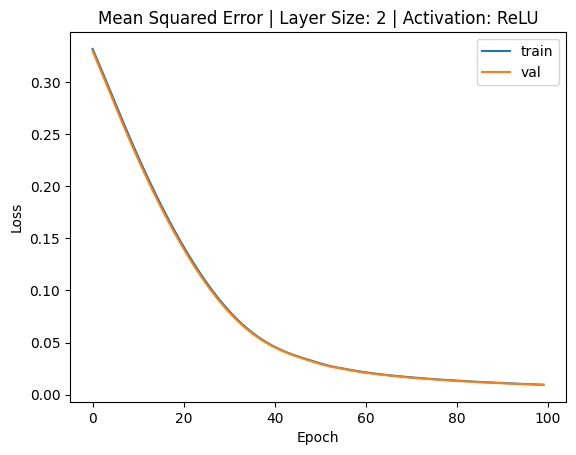

57/57 [==============================] - 0s 1ms/step


Activation Function:  ReLU 
Validation r2 score: 0.34607
Total no. of parameters: 17
MSE: 0.009364057947551534
AIC for Linear Regression: -8373.577773871062
BIC for Linear Regression: -8280.15356082503


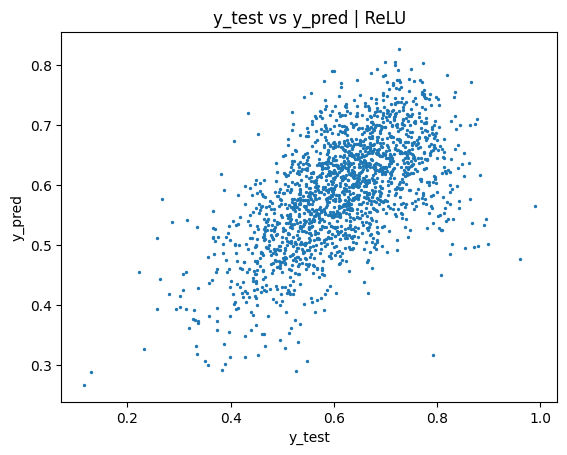

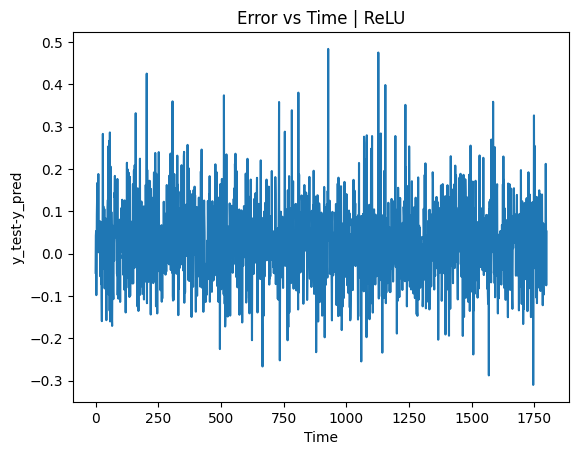



activation: tanh


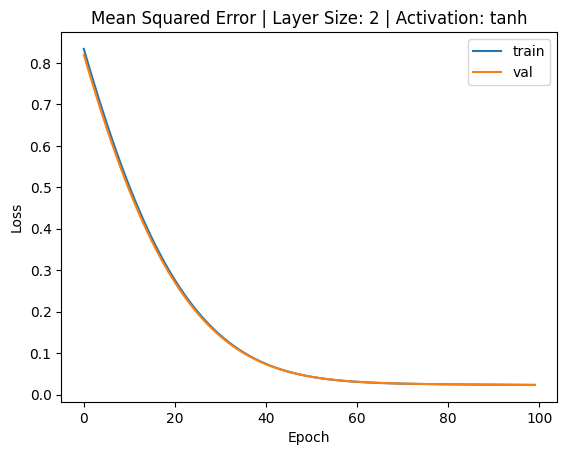

57/57 [==============================] - 0s 2ms/step


Activation Function:  tanh 
Validation r2 score: 0.83423
Total no. of parameters: 17
MSE: 0.02339032123002743
AIC for Linear Regression: -6725.779336698184
BIC for Linear Regression: -6632.355123652152


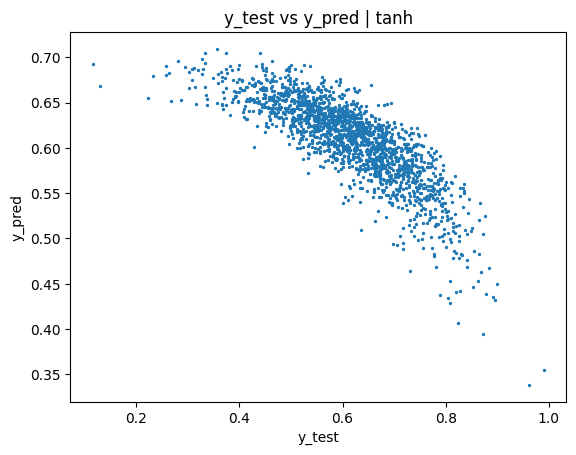

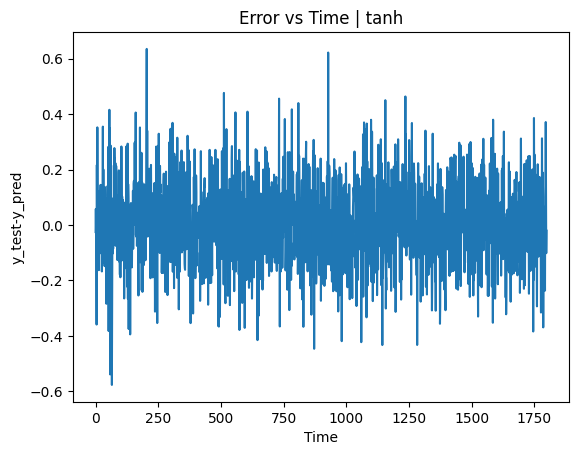



activation: sigmoid


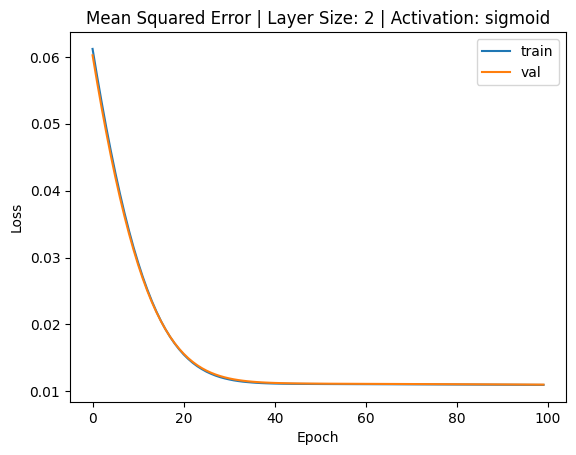

57/57 [==============================] - 0s 2ms/step


Activation Function:  sigmoid 
Validation r2 score: 0.98098
Total no. of parameters: 17
MSE: 0.011004929270775952
AIC for Linear Regression: -8082.941583858423
BIC for Linear Regression: -7989.51737081239


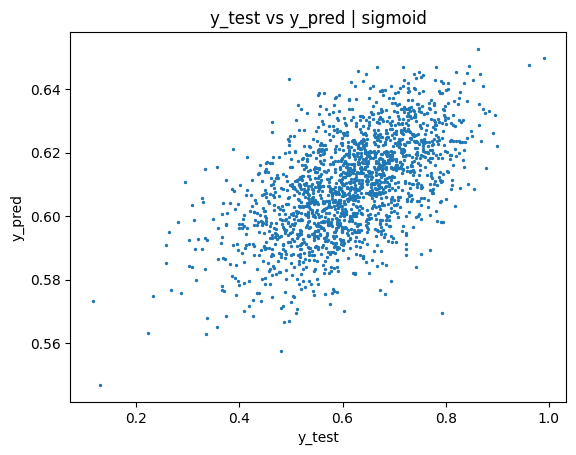

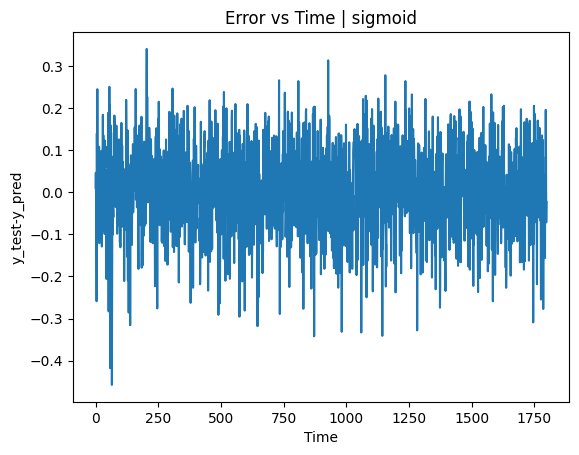








Layer Size:   40 

activation: ReLU


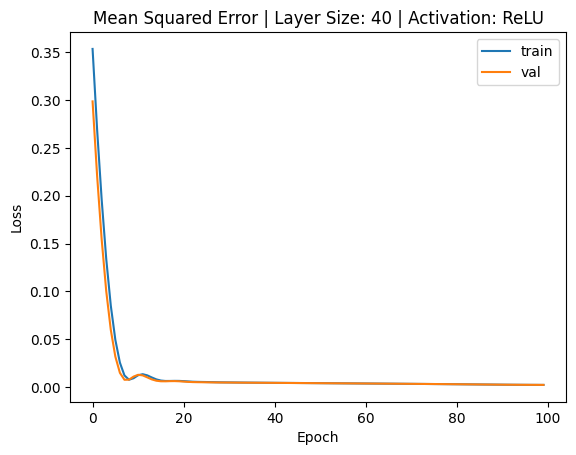

57/57 [==============================] - 0s 2ms/step


Activation Function:  ReLU 
Validation r2 score: 0.09309
Total no. of parameters: 1841
MSE: 0.0023713833696311732
AIC for Linear Regression: -7197.707228939935
BIC for Linear Regression: 2919.5854897509817


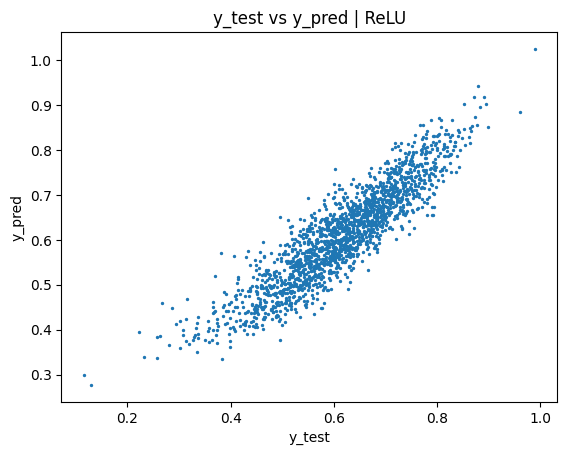

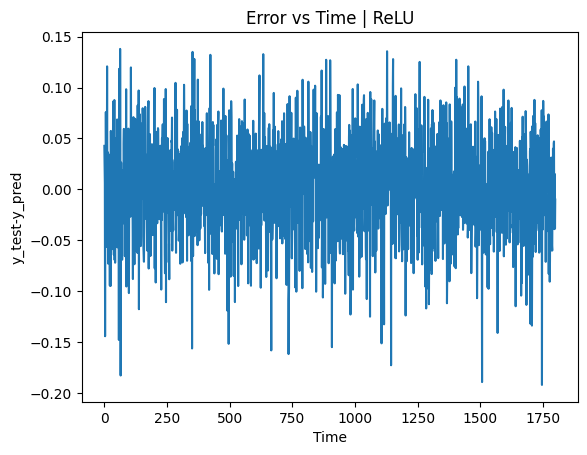



activation: tanh


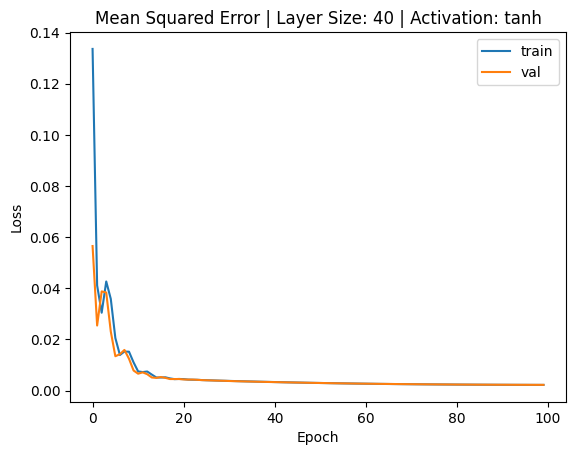

57/57 [==============================] - 0s 2ms/step


Activation Function:  tanh 
Validation r2 score: 0.10607
Total no. of parameters: 1841
MSE: 0.002233633071402542
AIC for Linear Regression: -7305.426510529513
BIC for Linear Regression: 2811.866208161404


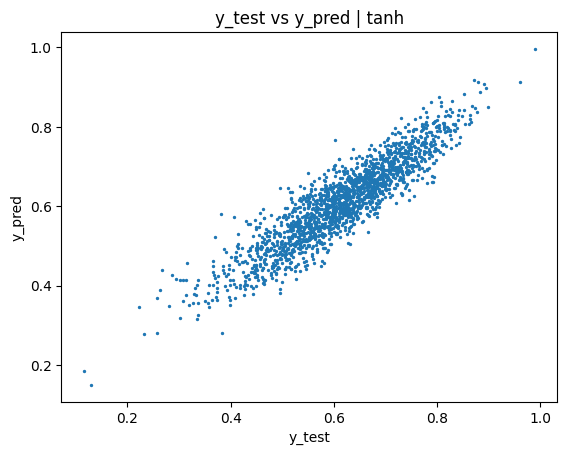

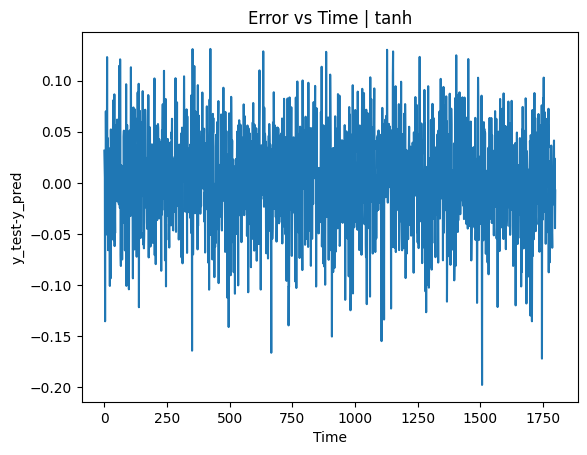



activation: sigmoid


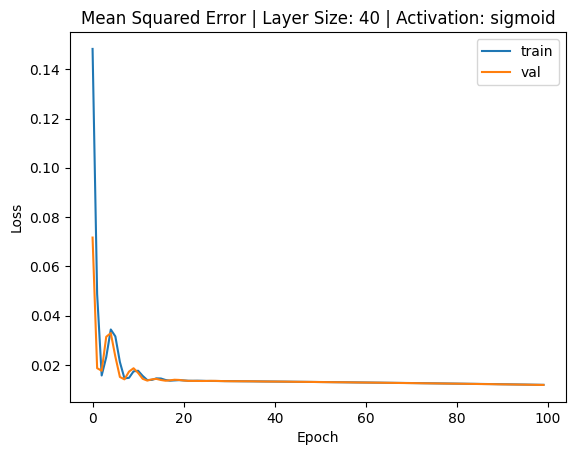

57/57 [==============================] - 0s 2ms/step


Activation Function:  sigmoid 
Validation r2 score: 0.99685
Total no. of parameters: 1841
MSE: 0.011853492949070597
AIC for Linear Regression: -4301.238844161103
BIC for Linear Regression: 5816.053874529814


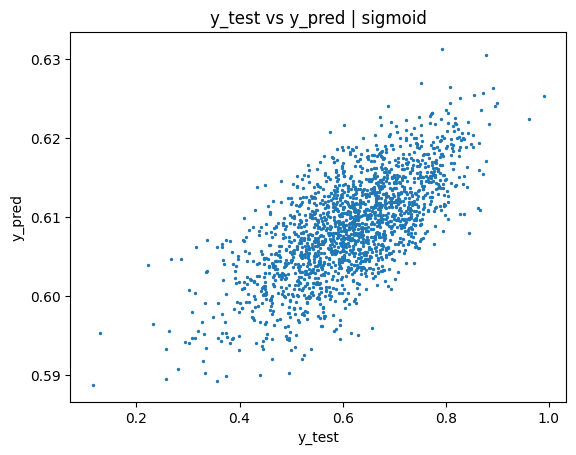

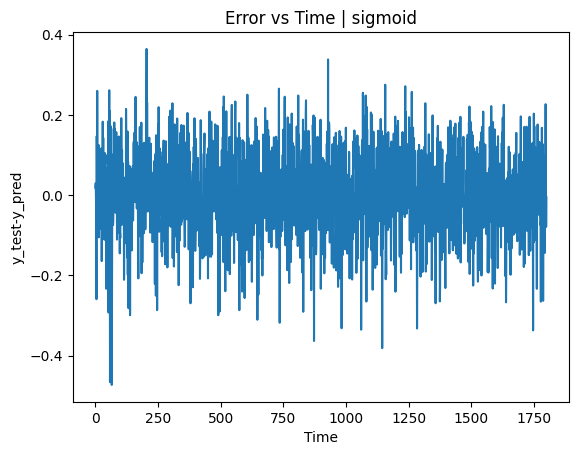








Layer Size:   800 

activation: ReLU


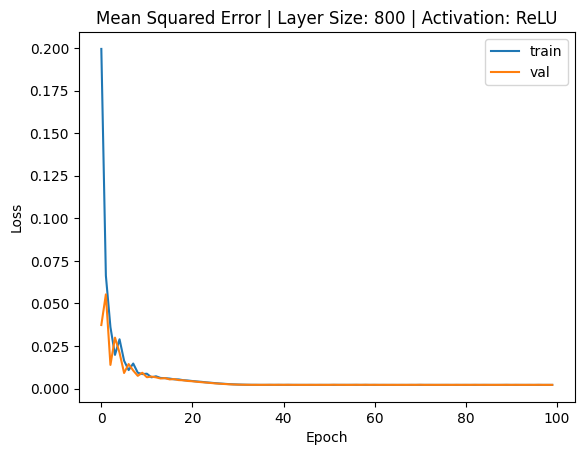

57/57 [==============================] - 0s 3ms/step


Activation Function:  ReLU 
Validation r2 score: 0.13207
Total no. of parameters: 644801
MSE: 0.0021650740391680784
AIC for Linear Regression: 1278558.4587042117
BIC for Linear Regression: 4822089.399662724


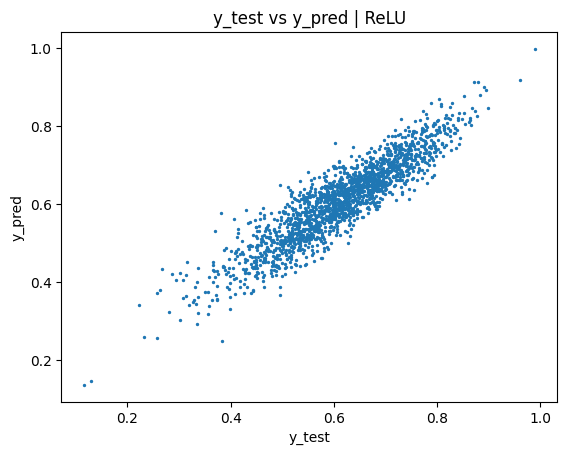

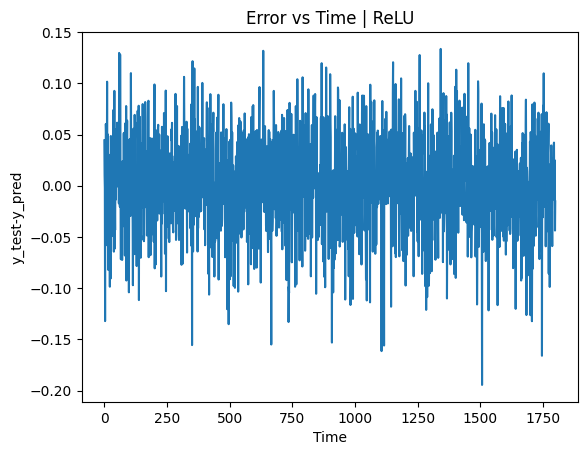



activation: tanh


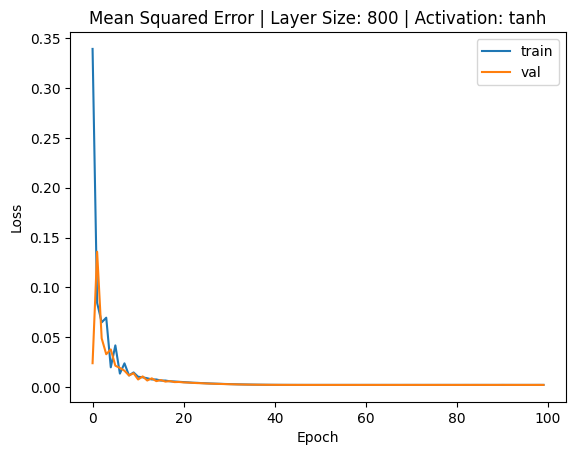

57/57 [==============================] - 0s 5ms/step


Activation Function:  tanh 
Validation r2 score: 0.14272
Total no. of parameters: 644801
MSE: 0.0021544549523039754
AIC for Linear Regression: 1278549.6084823934
BIC for Linear Regression: 4822080.549440905


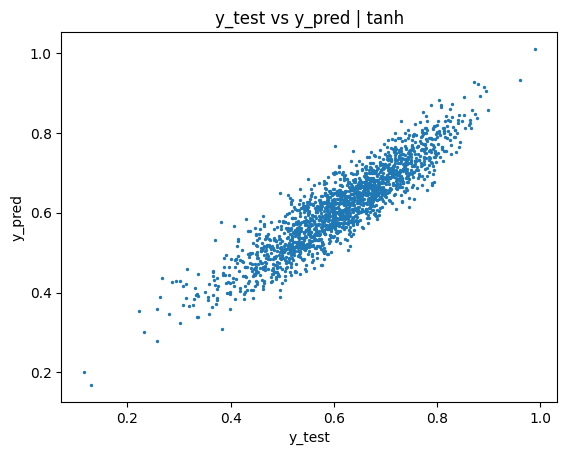

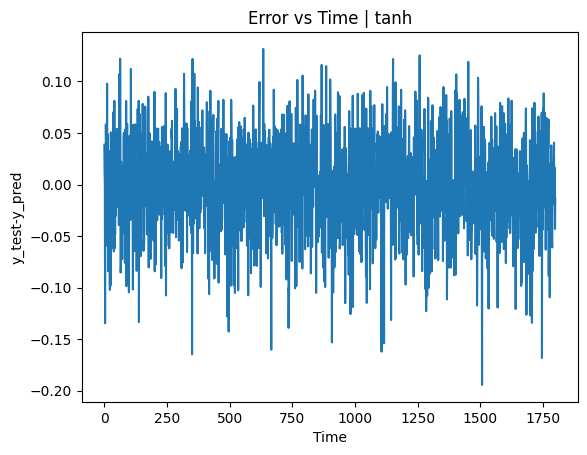



activation: sigmoid


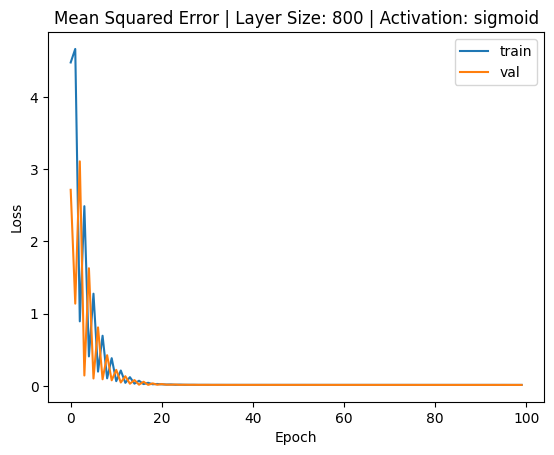

57/57 [==============================] - 0s 5ms/step


Activation Function:  sigmoid 
Validation r2 score: 0.9989
Total no. of parameters: 644801
MSE: 0.012021620251940632
AIC for Linear Regression: 1281644.1125872754
BIC for Linear Regression: 4825175.053545787


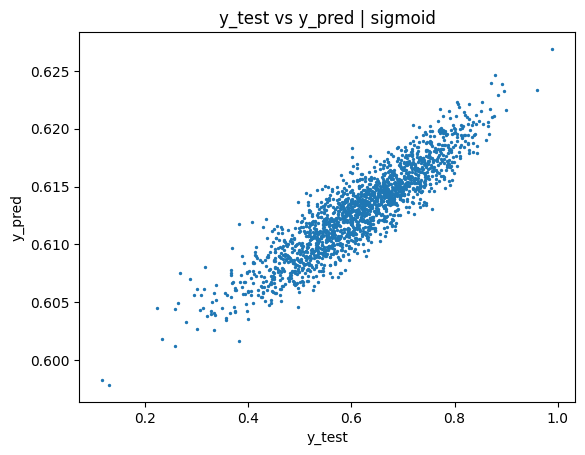

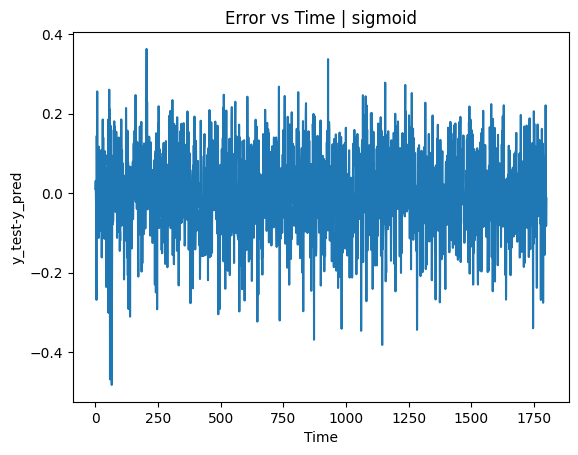

In [ ]:
from sklearn.metrics import r2_score
import math
import statistics
input_shape=(3,)
Output_shape = 1
results_shallow=[]
for layer_size in [2,40,800]:
  print('Layer Size:  ',layer_size,'\n')
  for acti in ['ReLU','tanh', 'sigmoid']:
    # Define the model architecture
    print('activation:',acti)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(layer_size, activation=acti, input_shape=input_shape),
        tf.keras.layers.Dense(layer_size, activation=acti),
        tf.keras.layers.Dense(Output_shape , activation='linear')
    ])

    optimizer = tf.keras.optimizers.Adam()

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mse'])


    history=model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=1500,epochs=100,verbose=0)

    plt.plot(history.history['mse'], label='train')
    plt.plot(history.history['val_mse'], label='val')
    plt.title(f'Mean Squared Error | Layer Size: {layer_size} | Activation: {acti}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Evaluate the model performance on the validation data (e.g., using mean squared error)
    y_pred = model.predict(X_test)

    r2 = 1-statistics.variance(y_pred[:,0])/statistics.variance(y_test[:,0])
    print('\n\n\033[1mActivation Function: ',acti,'\033[0m')
    print("Validation r2 score:", round(r2,5))
    n_features = model.count_params()

    mse= mean_squared_error(y_test, y_pred)

    # Calculate AIC (assuming you have the number of observations in y)
    n_obs = len(y_test)
    aic = math.log(mse) * n_obs + 2 * n_features
    bic = n_obs * math.log(mse) + n_features * math.log(n_obs)
    print('Total no. of parameters:', n_features)
    print('MSE:', mse)
    print("AIC for Linear Regression:", aic)
    print("BIC for Linear Regression:", bic)

    results_shallow.append([layer_size, acti, r2, mse, aic, bic])

    plt.scatter(y_test, y_pred,s=2)
    plt.title(f'y_test vs y_pred | {acti}')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()

    plt.plot(y_test-y_pred)
    plt.title(f'Error vs Time | {acti}')
    plt.xlabel('Time')
    plt.ylabel('y_test-y_pred')
    plt.show()
    print('\n')
  print('\n\n\n\n')

# Deep Neural Network


Layer Size:   15 

Number of Layers:   30 

activation: tanh


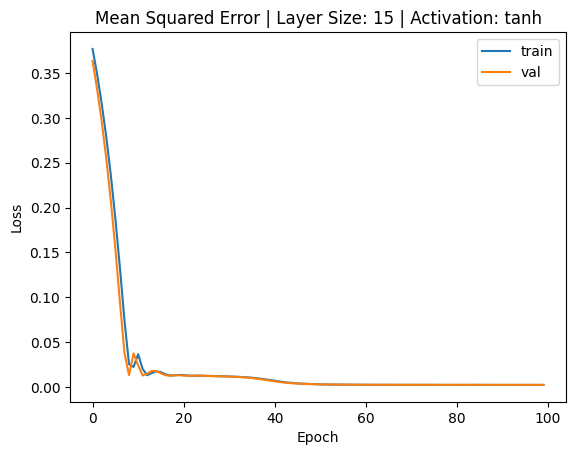

57/57 [==============================] - 0s 2ms/step


Activation Function:  tanh 
Validation r2 score: 0.15807
Total no. of parameters: 6796
MSE: 0.002211925662781832
AIC for Linear Regression: 2586.994755996653
BIC for Linear Regression: 39934.69780663406


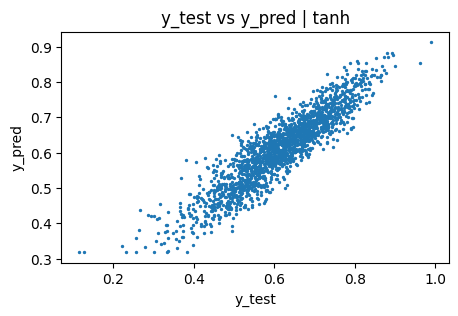

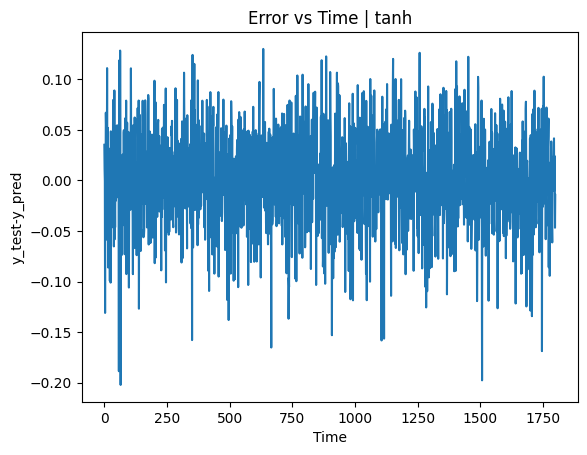






Number of Layers:   150 

activation: tanh


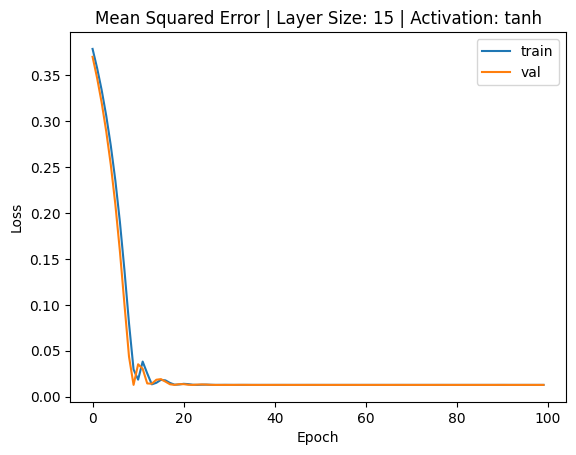

57/57 [==============================] - 1s 5ms/step


Activation Function:  tanh 
Validation r2 score: 1.0
Total no. of parameters: 35596
MSE: 0.012794974889229245
AIC for Linear Regression: 63346.33501054779
BIC for Linear Regression: 258965.64604505178


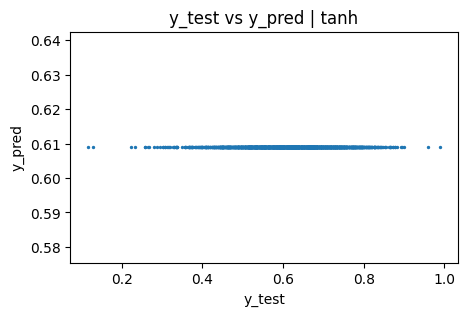

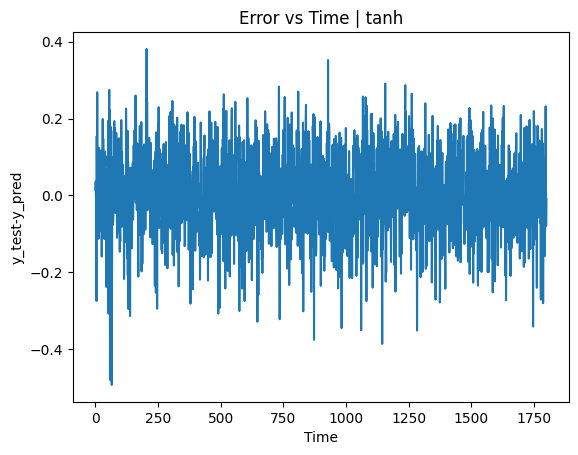






Number of Layers:   350 

activation: tanh


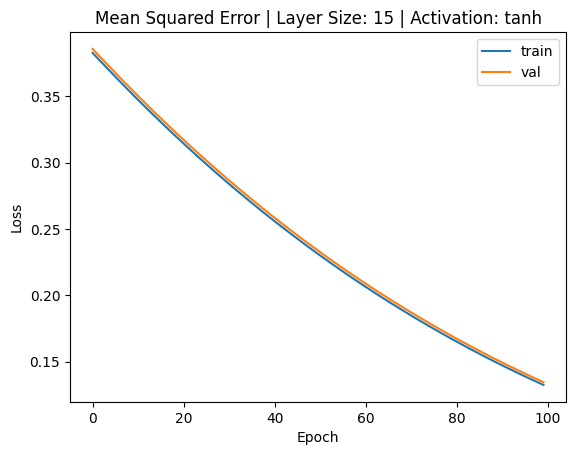

57/57 [==============================] - 4s 10ms/step


Activation Function:  tanh 
Validation r2 score: 1.0
Total no. of parameters: 83596
MSE: 0.13438612739476824
AIC for Linear Regression: 163579.331464983
BIC for Linear Regression: 622984.6558059313


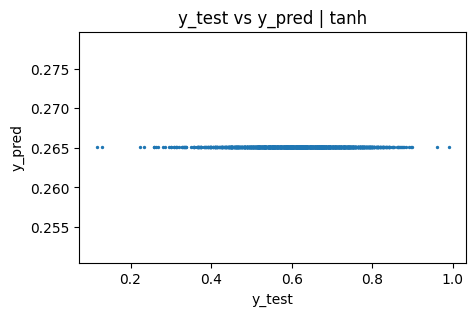

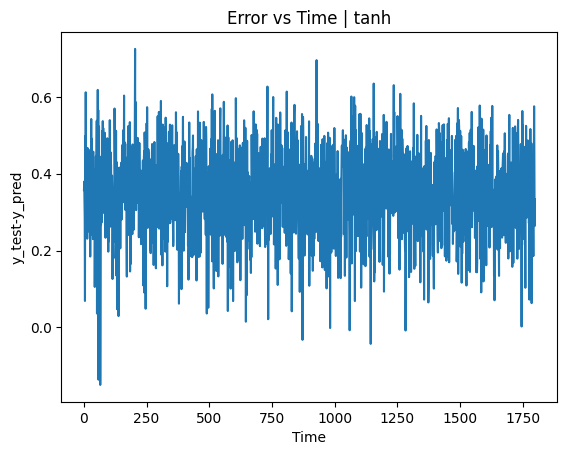

In [ ]:
from sklearn.metrics import r2_score
import math
import statistics
input_shape=(3,)
Output_shape = 1
results_shallow=[]
layer_size=15
print('Layer Size:  ',layer_size,'\n')
for layer_count in [30,150,350]:
  print('Number of Layers:  ',layer_count,'\n')

  # Define the model architecture
  print('activation:',acti)
  model = tf.keras.models.Sequential([tf.keras.layers.Dense(layer_size, activation=acti, input_shape=input_shape)])
  for i in range(layer_count-2):
      model.add(tf.keras.layers.Dense(layer_size, activation='relu'))
  model.add(tf.keras.layers.Dense(Output_shape , activation='linear'))
  optimizer = tf.keras.optimizers.Adam()

  # Compile the model
  model.compile(optimizer=optimizer,
                loss='mse',
                metrics=['mse'])


  history=model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=1500,epochs=100,verbose=0)

  plt.plot(history.history['mse'], label='train')
  plt.plot(history.history['val_mse'], label='val')
  plt.title(f'Mean Squared Error | Layer Size: {layer_size} | Activation: {acti}')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  # Evaluate the model performance on the validation data (e.g., using mean squared error)
  y_pred = model.predict(X_test)
  r2 = 1-statistics.variance(y_pred[:,0])/statistics.variance(y_test[:,0])
  print('\n\n\033[1mActivation Function: ',acti,'\033[0m')
  print("Validation r2 score:", round(r2,5))
  n_features = model.count_params()

  mse= mean_squared_error(y_test, y_pred)

  # Calculate AIC (assuming you have the number of observations in y)
  n_obs = len(y_test)
  aic = math.log(mse) * n_obs + 2 * n_features
  bic = n_obs * math.log(mse) + n_features * math.log(n_obs)
  print('Total no. of parameters:', n_features)
  print('MSE:', mse)
  print("AIC for Linear Regression:", aic)
  print("BIC for Linear Regression:", bic)

  results_shallow.append([layer_size, acti, r2, mse, aic, bic])
  fig, ax = plt.subplots()
  fig.set_figwidth(5)
  fig.set_figheight(3)
  plt.scatter(y_test, y_pred,s=2)
  plt.title(f'y_test vs y_pred | {acti}')
  plt.xlabel('y_test')
  plt.ylabel('y_pred')
  plt.show()

  plt.plot(y_test-y_pred)
  plt.title(f'Error vs Time | {acti}')
  plt.xlabel('Time')
  plt.ylabel('y_test-y_pred')
  plt.show()

  print('\n\n\n\n')

In [ ]:
#

# LSTM

In [ ]:
def shift(x,step):
  x=list(x)
  return [x[i+step] for i in range(0, len(x)-i)]

for i in range(1,100):
  b=shift(y_test,i)
  a=y_test[0:-i]
  a = a - np.mean(a)
  b = b - np.mean(b)
  print(i,': ',np.dot(a, b) / math.sqrt(np.dot(a, a) * np.dot(b, b)))

1 :  -0.009789041181409651
2 :  0.016727631871337544
3 :  -0.020705234781106426
4 :  0.004074200219980327
5 :  -0.0020992186589245186
6 :  0.0012160421664498685
7 :  0.020189256127169673
8 :  -0.0040150425831454156
9 :  0.032878397604481684
10 :  -0.009895664934726526
11 :  -0.01567693634793725
12 :  0.03535499796968139
13 :  -0.00826582308896179
14 :  0.022407713444807062
15 :  -0.0486686295519616
16 :  -0.03268217851928978
17 :  0.04833138300242367
18 :  -0.0016240092999714006
19 :  0.006495460982608793
20 :  -0.009906433215955501
21 :  0.019038927403787327
22 :  -0.004131964262136285
23 :  0.026903246964791874
24 :  -0.0001654357406652292
25 :  -0.04119577035194877
26 :  -0.012795878465738056
27 :  0.01768168607265312
28 :  0.015780003622081117
29 :  -0.019969850786441992
30 :  0.007341119220767488
31 :  0.015308298173006765
32 :  -0.06285356503209771
33 :  -0.011249845147208814
34 :  0.020787794219882607
35 :  0.0007393633532264868
36 :  -0.029555388615987263
37 :  0.00393264042235

In [ ]:
sequence_length=18

Epoch 1/20
131/131 [==============================] - 11s 47ms/step - loss: 2.5447 - val_loss: 1.5074e-04
Epoch 2/20
131/131 [==============================] - 4s 31ms/step - loss: 1.5437e-04 - val_loss: 1.4873e-04
Epoch 3/20
131/131 [==============================] - 4s 29ms/step - loss: 1.5352e-04 - val_loss: 1.4951e-04
Epoch 4/20
131/131 [==============================] - 5s 41ms/step - loss: 1.5357e-04 - val_loss: 1.6288e-04
Epoch 5/20
131/131 [==============================] - 4s 30ms/step - loss: 1.5406e-04 - val_loss: 1.4852e-04
Epoch 6/20
131/131 [==============================] - 4s 29ms/step - loss: 1.5382e-04 - val_loss: 1.5469e-04
Epoch 7/20
131/131 [==============================] - 5s 40ms/step - loss: 1.5709e-04 - val_loss: 1.5090e-04
Epoch 8/20
131/131 [==============================] - 6s 42ms/step - loss: 1.5446e-04 - val_loss: 1.4771e-04
Epoch 9/20
131/131 [==============================] - 4s 29ms/step - loss: 1.5673e-04 - val_loss: 1.5091e-04
Epoch 10/20
131/131 [=

Exception ignored in: <function _xla_gc_callback at 0x7b86dd85d2d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


57/57 [==============================] - 59s 13ms/step


Activation Function:  tanh 
Validation r2 score: 0.98827
Total no. of parameters: 71851
MSE: 0.00014362540127040087
AIC for Linear Regression: 127775.05634973764
BIC for Linear Regression: 522635.2405597653


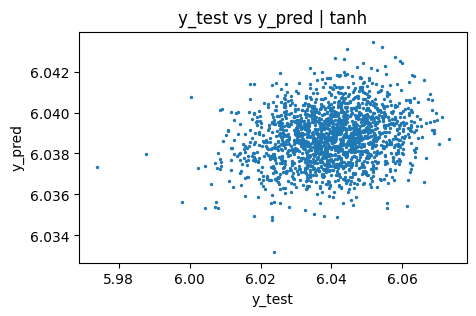

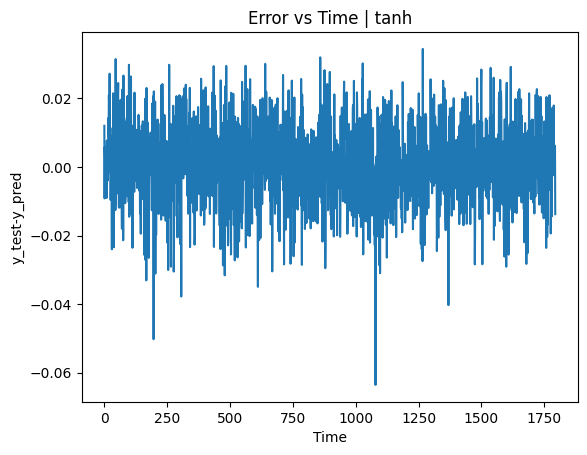

Epoch 1/20
131/131 [==============================] - 15s 67ms/step - loss: 2.2861 - val_loss: 1.5522e-04
Epoch 2/20
131/131 [==============================] - 10s 75ms/step - loss: 1.5329e-04 - val_loss: 1.5401e-04
Epoch 3/20
131/131 [==============================] - 9s 71ms/step - loss: 1.5390e-04 - val_loss: 1.5234e-04
Epoch 4/20
131/131 [==============================] - 8s 62ms/step - loss: 1.5372e-04 - val_loss: 1.5244e-04
Epoch 5/20
131/131 [==============================] - 10s 75ms/step - loss: 1.5418e-04 - val_loss: 1.5202e-04
Epoch 6/20
131/131 [==============================] - 9s 72ms/step - loss: 1.5495e-04 - val_loss: 1.6066e-04
Epoch 7/20
131/131 [==============================] - 8s 61ms/step - loss: 1.5594e-04 - val_loss: 1.5601e-04
Epoch 8/20
131/131 [==============================] - 10s 73ms/step - loss: 1.5369e-04 - val_loss: 1.5152e-04
Epoch 9/20
131/131 [==============================] - 11s 81ms/step - loss: 1.5354e-04 - val_loss: 1.5320e-04
Epoch 10/20
131/13

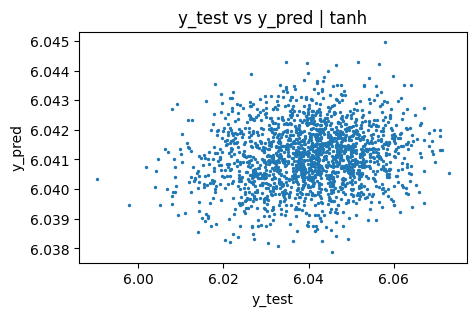

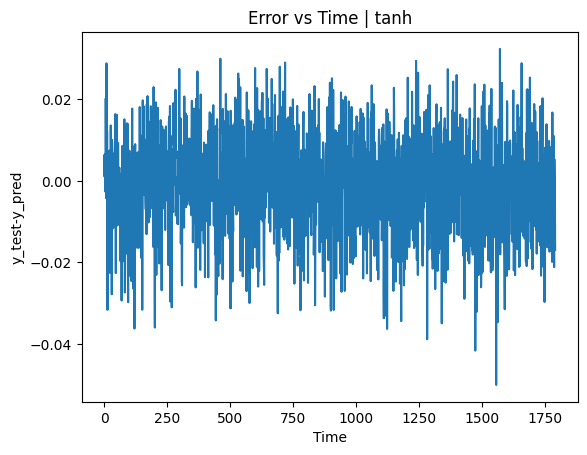

Epoch 1/20
130/130 [==============================] - 17s 89ms/step - loss: 2.0108 - val_loss: 1.6160e-04
Epoch 2/20
130/130 [==============================] - 10s 76ms/step - loss: 1.4814e-04 - val_loss: 1.6086e-04
Epoch 3/20
130/130 [==============================] - 12s 94ms/step - loss: 1.4867e-04 - val_loss: 1.6097e-04
Epoch 4/20
130/130 [==============================] - 11s 85ms/step - loss: 1.4906e-04 - val_loss: 1.6062e-04
Epoch 5/20
130/130 [==============================] - 12s 93ms/step - loss: 1.5024e-04 - val_loss: 1.6243e-04
Epoch 6/20
130/130 [==============================] - 11s 85ms/step - loss: 1.5060e-04 - val_loss: 1.6449e-04
Epoch 7/20
130/130 [==============================] - 11s 85ms/step - loss: 1.5186e-04 - val_loss: 1.6066e-04
Epoch 8/20
130/130 [==============================] - 11s 87ms/step - loss: 1.5103e-04 - val_loss: 1.6010e-04
Epoch 9/20
130/130 [==============================] - 12s 92ms/step - loss: 1.4897e-04 - val_loss: 1.6053e-04
Epoch 10/20
13

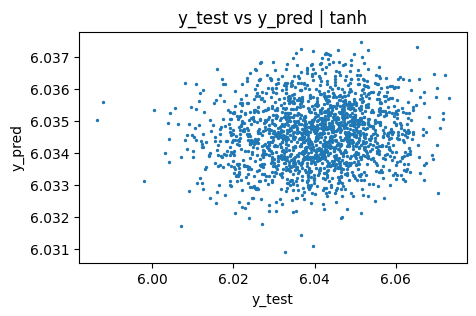

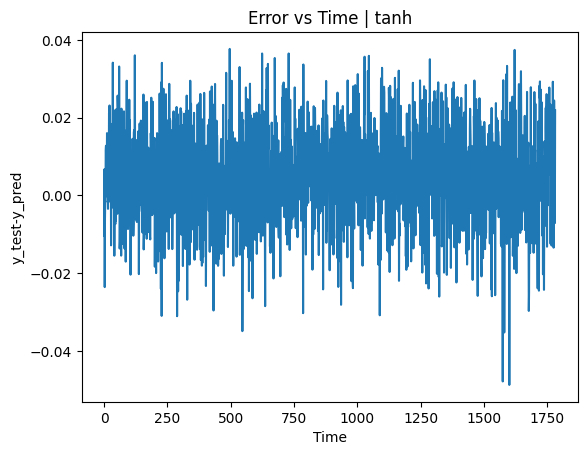

Epoch 1/20
130/130 [==============================] - 26s 157ms/step - loss: 1.9079 - val_loss: 1.6756e-04
Epoch 2/20
130/130 [==============================] - 19s 147ms/step - loss: 1.4894e-04 - val_loss: 1.5486e-04
Epoch 3/20
130/130 [==============================] - 19s 148ms/step - loss: 1.4730e-04 - val_loss: 1.6378e-04
Epoch 4/20
130/130 [==============================] - 19s 146ms/step - loss: 1.5121e-04 - val_loss: 1.5071e-04
Epoch 5/20
130/130 [==============================] - 19s 148ms/step - loss: 1.5080e-04 - val_loss: 1.6134e-04
Epoch 6/20
130/130 [==============================] - 19s 145ms/step - loss: 1.5115e-04 - val_loss: 1.5211e-04
Epoch 7/20
130/130 [==============================] - 19s 144ms/step - loss: 1.4838e-04 - val_loss: 1.5342e-04
Epoch 8/20
130/130 [==============================] - 21s 158ms/step - loss: 1.4842e-04 - val_loss: 1.5389e-04
Epoch 9/20
130/130 [==============================] - 19s 143ms/step - loss: 1.5132e-04 - val_loss: 1.5021e-04
Epoch

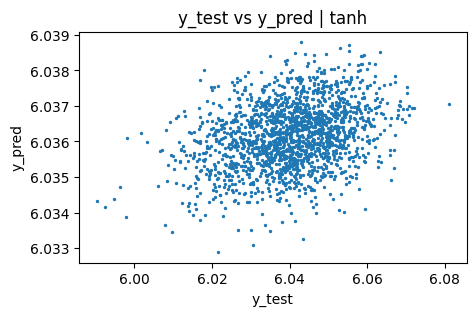

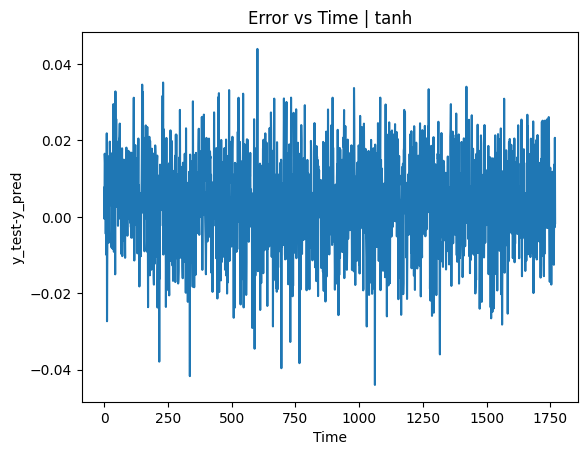

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

def create_sequences(data, target, sequence_length):
  sequences = []
  targets = []
  for i in range(len(data)-sequence_length-1):
    sequence = data[i:i+sequence_length]
    target_value = target.iloc[i+sequence_length]
    sequences.append(sequence)
    targets.append(target_value)
  return np.array(sequences), np.array(targets)

features = pd.DataFrame(df.iloc[:, [2,3,4]]  )
target = pd.DataFrame(df.iloc[:, -1])
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)
results_lstm=[]
# X_norm = MinMaxScaler(feature_range=(0, 0.99))
# Y_norm = MinMaxScaler(feature_range=(0, 0.99))

# Normalize input and target variables

# X_scaled = X_norm.fit_transform(features)
# y_scaled = Y_norm.fit_transform(target.values.reshape(-1,1))
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3)
for sequence_length in [18, 32, 56, 100]:
  train_sequences, train_targets = create_sequences(scaled_data, target, sequence_length)

  # Split data into training and validation sets (optional)

  X_train, X_val, y_train, y_val = train_test_split(train_sequences, train_targets, test_size=0.3, random_state=42)

  # Build LSTM model
  model = Sequential()
  model.add(LSTM(units=100, return_sequences=True, input_shape=(sequence_length, features.shape[1])))  # 100 LSTM units, returning sequences for next layer
  model.add(LSTM(units=50))  # 50 units in the second LSTM layer
  model.add(Dense(1))  # Output layer with 1 unit for single target value prediction

  # Compile model
  model.compile(loss="mse", optimizer="adam")  # Mean squared error loss and adam optimizer

  # Train model
  model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=0)

  y_pred=model.predict(X_val)

  r2 = 1-statistics.variance(y_pred.reshape(y_pred.shape[0],))/statistics.variance(y_val.reshape(y_val.shape[0],))
  print('\n\n\033[1mActivation Function: ',acti,'\033[0m')
  print("Validation r2 score:", round(r2,5))
  n_features = model.count_params()

  mse= mean_squared_error(y_pred.reshape(y_pred.shape[0],), y_val.reshape(y_val.shape[0],))

  # Calculate AIC (assuming you have the number of observations in y)
  n_obs = len(y_test)
  aic = math.log(mse) * n_obs + 2 * n_features
  bic = n_obs * math.log(mse) + n_features * math.log(n_obs)
  print('Total no. of parameters:', n_features)
  print('MSE:', mse)
  print("AIC for Linear Regression:", aic)
  print("BIC for Linear Regression:", bic)

  results_lstm.append([layer_size, acti, r2, mse, aic, bic])
  fig, ax = plt.subplots()
  fig.set_figwidth(5)
  fig.set_figheight(3)
  plt.scatter(y_val.reshape(y_val.shape[0],), y_pred.reshape(y_pred.shape[0],),s=2)
  plt.title(f'y_test vs y_pred | {acti}')
  plt.xlabel('y_test')
  plt.ylabel('y_pred')
  plt.show()

  plt.plot(y_val.reshape(y_val.shape[0],)-y_pred.reshape(y_pred.shape[0],))
  plt.title(f'Error vs Time | {acti}')
  plt.xlabel('Time')
  plt.ylabel('y_test-y_pred')
  plt.show()

57/57 [==============================] - 1s 9ms/step


Activation Function:  tanh 
Validation r2 score: 0.99203
Total no. of parameters: 71851
MSE: 0.00014410691974662982
AIC for Linear Regression: 127781.08093580618
BIC for Linear Regression: 522641.26514583384


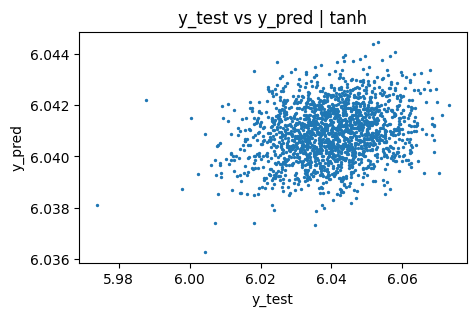

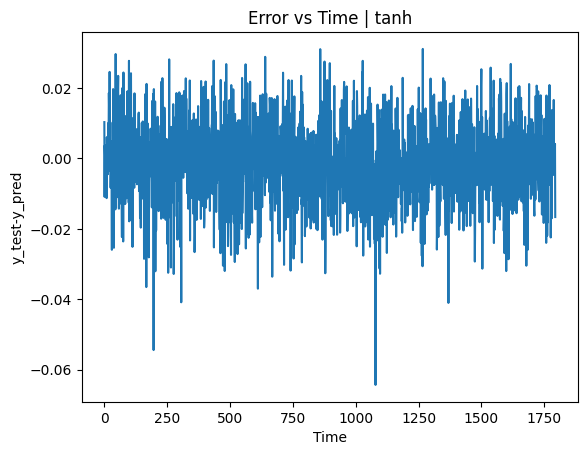

In [ ]:
y_pred=model.predict(X_val)

r2 = 1-statistics.variance(y_pred.reshape(y_pred.shape[0],))/statistics.variance(y_val.reshape(y_val.shape[0],))
print('\n\n\033[1mActivation Function: ',acti,'\033[0m')
print("Validation r2 score:", round(r2,5))
n_features = model.count_params()

mse= mean_squared_error(y_pred.reshape(y_pred.shape[0],), y_val.reshape(y_val.shape[0],))

# Calculate AIC (assuming you have the number of observations in y)
n_obs = len(y_test)
aic = math.log(mse) * n_obs + 2 * n_features
bic = n_obs * math.log(mse) + n_features * math.log(n_obs)
print('Total no. of parameters:', n_features)
print('MSE:', mse)
print("AIC for Linear Regression:", aic)
print("BIC for Linear Regression:", bic)
results_lstm=[]
results_lstm.append([layer_size, acti, r2, mse, aic, bic])
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(3)
plt.scatter(y_val.reshape(y_val.shape[0],), y_pred.reshape(y_pred.shape[0],),s=2)
plt.title(f'y_test vs y_pred | {acti}')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

plt.plot(y_val.reshape(y_val.shape[0],)-y_pred.reshape(y_pred.shape[0],))
plt.title(f'Error vs Time | {acti}')
plt.xlabel('Time')
plt.ylabel('y_test-y_pred')
plt.show()

In [ ]:
print(y_pred.reshape(y_pred.shape[0],))
print(y_val.reshape(y_val.shape[0],))

[6.0416346 6.041245  6.0409436 ... 6.042145  6.040425  6.041155 ]
[6.05196349 6.03032399 6.04464853 ... 6.0386419  6.04454914 6.02450974]


# Just in Time

In [ ]:
import tensorflow as tf
from keras.metrics import MeanAbsoluteError
import keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
import pandas as pd
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from keras.layers import Input
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.applications import VGG16, ResNet50, InceptionV3, Xception
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
!pip install keras-tuner
from kerastuner.tuners import RandomSearch





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


<ipython-input-6-0f75d79edeca>:26: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


## ANN

In [ ]:
training_pool=50
k=training_pool
data = df.iloc[:, [2,3,4,5]]
X_norm = MinMaxScaler(feature_range=(0, 0.99))

# Normalize input and target variables

data_scaled = X_norm.fit_transform(data)
y_scaled = Y_norm.fit_transform(target.values.reshape(-1,1))

def k_nearest_neighbours(Data, new_point, k):
  distances = np.linalg.norm(Data.iloc[:,[i for i in range(0, len(new_point))]] - new_point, axis=1)
  nearest_neighbor_ids = distances.argsort()[:k]
  return Data.iloc[nearest_neighbor_ids]


In [ ]:
features = pd.DataFrame(data).iloc[:, [0,1,2]]
target = pd.DataFrame(data).iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)


In [ ]:
print(features)
print(target)

      Jacket Temperature (T)  Monomer inlet Flowrate (F)  \
0                 331.874633                    1.028782   
1                 334.982669                    1.003295   
2                 332.124375                    0.987497   
3                 326.586010                    1.000396   
4                 336.650641                    1.001877   
...                      ...                         ...   
5995              331.579177                    0.998318   
5996              332.492580                    1.008761   
5997              328.797109                    1.013801   
5998              330.851358                    1.004470   
5999              330.365879                    1.006346   

      Inlet temparature of Feed (Tin)  
0                          350.014529  
1                          349.904450  
2                          350.088297  
3                          350.167016  
4                          349.933011  
...                               ...  

In [ ]:
def predict_shallow(n_nodes, data_train, X_test, acti='ReLU'):
  y_pred=[]
  print(X_test.shape[0])
  for i in range(0, X_test.shape[0]):
    x_new=X_test.iloc[i].values
    X_train=pd.DataFrame(k_nearest_neighbours(data_train, x_new, training_pool)).iloc[:,[i for i in range(0, len(x_new))]]

    # # [:,[i for i in range(0,len(x_new))]]
    y_train=pd.DataFrame(k_nearest_neighbours(data_train, x_new, training_pool)).iloc[:,-1]
    # print(X_train.shape,y_train.shape)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n_nodes, activation=acti, input_shape=x_new.shape),
        tf.keras.layers.Dense(n_nodes, activation=acti),
        tf.keras.layers.Dense(1 , activation='linear')
    ])
    optimizer = tf.keras.optimizers.Adam()
    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mse'])
    history=model.fit(X_train, y_train,batch_size=50,epochs=20,verbose=0)
    # print(x_new)
    # print(X_train.shape, x_new.shape)
    y_new=model.predict(pd.DataFrame(x_new).T)
    y_pred.append(y_new)
    # print('y_pred is: ',y_pred,'\n')
    # break
  return y_pred

In [ ]:
demo=X_test.iloc[0:100]

y_pred=predict_shallow(15, pd.DataFrame(data), demo)

100
1/1 [==============================] - 0s 74ms/step


In [ ]:
y_test2=y_test.iloc[0:100]
y_pred2=y_pred



Activation Function:  tanh 
Validation r2 score: -21007205.14218
Total no. of parameters: 316
MSE: 3060.6601742965117
AIC for Linear Regression: 1434.6385914911355
BIC for Linear Regression: 2257.8723702633724


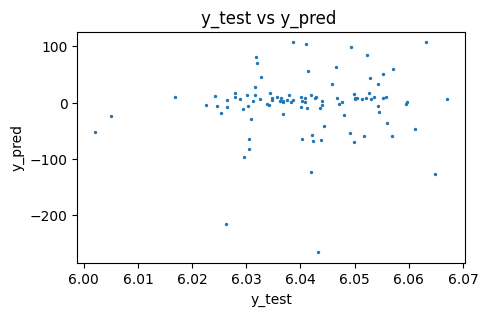

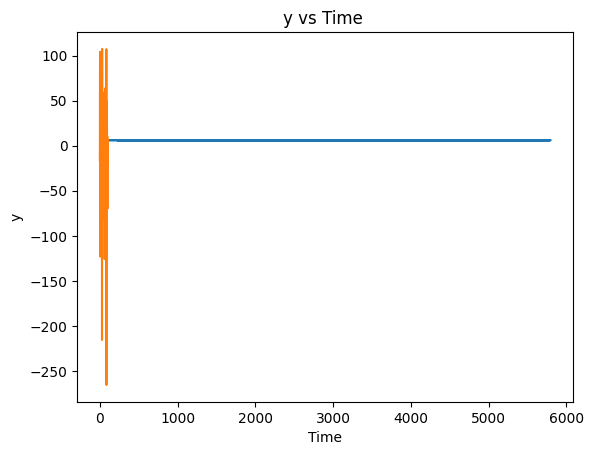

In [ ]:
import statistics
import math

acti='tanh'
r2 = 1-statistics.variance(np.array(y_pred).reshape(100,))/statistics.variance(y_test2)
print('\n\n\033[1mActivation Function: ',acti,'\033[0m')
print("Validation r2 score:", round(r2,5))
n_features = 316

mse= mean_squared_error(y_test2, np.array(y_pred2).reshape(100,))
layer_size=15
# Calculate AIC (assuming you have the number of observations in y)
n_obs = len(y_test2)
aic = math.log(mse) * n_obs + 2 * n_features
bic = n_obs * math.log(mse) + n_features * math.log(n_obs)
print('Total no. of parameters:', n_features)
print('MSE:', mse)
print("AIC for Linear Regression:", aic)
print("BIC for Linear Regression:", bic)
results_JIT=[]
results_JIT.append([layer_size, r2, mse, aic, bic])
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(3)
plt.scatter(y_test2, np.array(y_pred2).reshape(100,),s=2)
plt.title(f'y_test vs y_pred ')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

plt.plot(y_test2)
plt.plot(np.array(y_pred2).reshape(100,))
plt.title(f'y vs Time ')
plt.xlabel('Time')
plt.ylabel('y')
plt.show()

## Regression

In [ ]:
import statistics
import math
def predict_shallow_regression(n_nodes, data_train, X_test, acti='ReLU'):
  y_pred=[]
  print(X_test.shape[0])
  for i in range(0, X_test.shape[0]):
    x_new=X_test.iloc[i].values
    X_train=pd.DataFrame(k_nearest_neighbours(data_train, x_new, training_pool)).iloc[:,[i for i in range(0, len(x_new))]]

    # # [:,[i for i in range(0,len(x_new))]]
    y_train=pd.DataFrame(k_nearest_neighbours(data_train, x_new, training_pool)).iloc[:,-1]
    # print(X_train.head(),y_train.head())
    # print(X_train.shape,y_train.shape)
    model = LinearRegression()
    history=model.fit(X_train, y_train)
    # print(x_new)
    # print(X_train.shape, x_new.shape)
    y_new=model.predict(pd.DataFrame(x_new).T)
    y_pred.append(y_new)
    # print('y_pred is: ',y_pred,'\n')
    # break
  return y_pred




In [ ]:
training_pool=50
k=training_pool
data = df.iloc[:, [2,3,4,5]]
X_norm = MinMaxScaler(feature_range=(0, 0.99))

# Normalize input and target variables

data_scaled = X_norm.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(data_scaled).iloc[:,[0,1,2]], pd.DataFrame(data_scaled).iloc[:,[-1]], test_size=0.3)
def k_nearest_neighbours(Data, new_point, k):
  distances = np.linalg.norm(Data.iloc[:,[i for i in range(0, len(new_point))]] - new_point, axis=1)
  nearest_neighbor_ids = distances.argsort()[:k]
  return Data.iloc[nearest_neighbor_ids]

demo=X_test

y_pred=predict_shallow_regression(15, pd.DataFrame(data_scaled), demo)

1800


<ipython-input-30-8cccad66938c>:3: RuntimeWarning: divide by zero encountered in scalar divide
  r2 = 1-statistics.variance(np.array(y_pred).reshape(1800,))/statistics.variance(y_test2)


Validation r2 score: -inf
Total no. of parameters: 4
MSE: 0.0020526129881778274
AIC for Linear Regression: -11131.555004382732
BIC for Linear Regression: -11109.572836607194


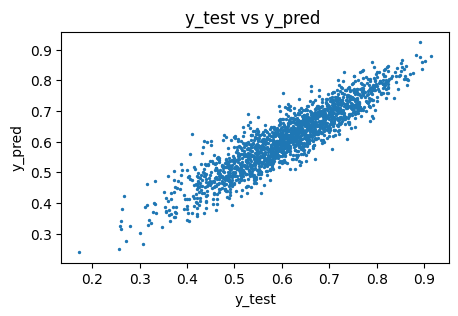

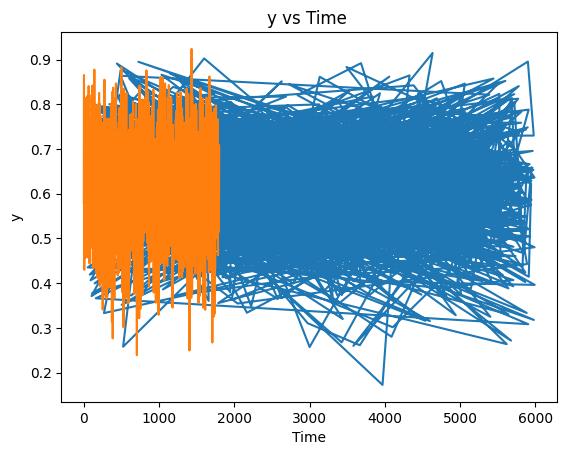

In [ ]:
# acti='tanh'
y_test2=y_test
r2 = 1-statistics.variance(np.array(y_pred).reshape(1800,))/statistics.variance(y_test2)
# print('\n\n\033[1mActivation Function: ',acti,'\033[0m')
print("Validation r2 score:", round(r2,5))
n_features = 4

mse= mean_squared_error(y_test2, np.array(y_pred).reshape(1800,))
# layer_size=15
# Calculate AIC (assuming you have the number of observations in y)
n_obs = len(y_test2)
aic = math.log(mse) * n_obs + 2 * n_features
bic = n_obs * math.log(mse) + n_features * math.log(n_obs)
print('Total no. of parameters:', n_features)
print('MSE:', mse)
print("AIC for Linear Regression:", aic)
print("BIC for Linear Regression:", bic)
results_JIT=[]
# results_JIT.append([layer_size, r2, mse, aic, bic])
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(3)
plt.scatter(y_test2, np.array(y_pred).reshape(1800,),s=2)
plt.title(f'y_test vs y_pred ')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()



,0,1,2
3553,0.565749,0.322534,0.478506
4458,0.364076,0.602132,0.348362
550,0.467054,0.476770,0.787678
1876,0.414150,0.353979,0.454799
4139,0.501742,0.616554,0.685291
